In [1]:
import os
from IPython.display import Image, display
import PIL
from PIL import ImageOps
import re
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import imutils

# Saeed MODEL _ Numerical cases

In [16]:
centre_sim = []
pred_area_ = []
gt_area_ = []
error = []
realAreaPerPixel = 1
os.chdir('/home/aijjeh/Desktop/Phd_Projects/Sequence_prediction/Full_wavefield_frames_time_series_project/Saee_numerical_outputs_Model_1/Output_Numerical_Data')
for i in range(95):
    data1 = cv2.imread('pred_%d.png' % i, 0)
    pred = cv2.resize(data1, (500,500))
    pred = pred/np.max(pred)
    pred = pred*255
    pred = (pred> 128) * pred
        
    data2 = cv2.imread('GT_%d.png' % i, 0)
    gt = cv2.resize(data2, (500,500))
    gt = gt/np.max(gt)
    gt = gt*255
    
    pred_x_y = np.where(pred>(np.max(pred)/2))    
    pred_coordinates = np.transpose(np.array(pred_x_y))
    x = [p[1] for p in pred_coordinates]
    y = [p[0] for p in pred_coordinates]
    pred_centroid = (sum(x) / len(pred_coordinates), sum(y) / len(pred_coordinates))
    
    gt_x_y = np.where(gt>(np.max(gt)-55))    
    gt_coordinates = np.transpose(np.array(gt_x_y))
    x = [p[1] for p in gt_coordinates]
    y = [p[0] for p in gt_coordinates]
    gt_centroid = (sum(x) / len(gt_coordinates), sum(y) / len(gt_coordinates))
    similarity = (pred_centroid[0]*gt_centroid[0] + pred_centroid[1]*gt_centroid[1])/ ((pred_centroid[0]**2+pred_centroid[1]**2)**.5 * (gt_centroid[0]**2+gt_centroid[1]**2)**.5)
    centre_sim.append(similarity)
    
    pred_area_ones = np.where(pred>128)
    pred_area = len(pred_area_ones[0])
    
    gt_area_ones = np.where(gt>128)
    gt_area = len(gt_area_ones[0])
    
    percent = np.abs(gt_area-pred_area) / (gt_area)
    pred_area_.append(pred_area)
    gt_area_.append(gt_area)
    error.append(percent)    

In [17]:
SIMM = sum(centre_sim)/len(centre_sim)
print(SIMM)

0.9999992425840311


In [18]:
err = sum(error)/len(error)
print('mean size error =', err*100,"%")

mean size error = 4.570672218541176 %


# Saeed MODEL _ Experimental cases CFRP_teflon_3o_375_375p_50kHz_5HC  

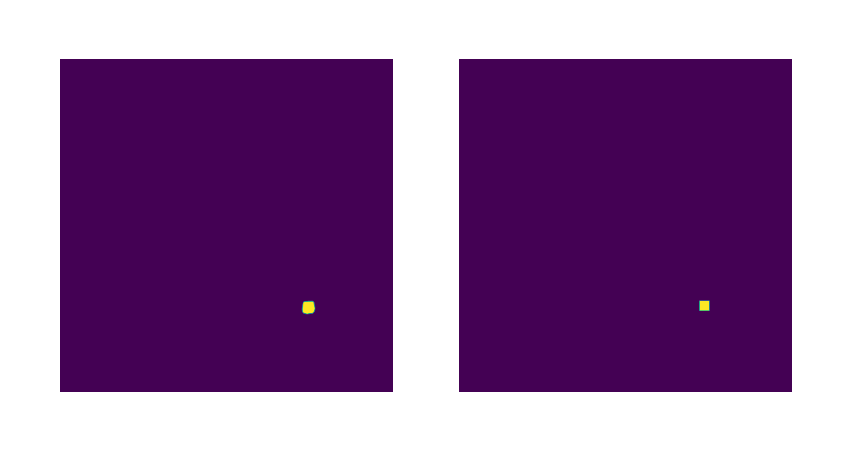

Pred area  319
GT area  225
(GT_area - Pred_area)/GT_area =  41.77777777777778 %


In [19]:
centre_sim = []
pred_area_ = []
gt_area_ = []
error = []
realAreaPerPixel = 1

os.chdir('/home/aijjeh/Desktop/Phd_Projects/Sequence_prediction/Full_wavefield_frames_time_series_project/AE_exp_results_frames_24_512_512/CFRP_teflon_3o_375_375p_50kHz_5HC_x12_15Vpp/RMS_iou')
data1 = cv2.imread('RMS_CFRP_teflon_3o_375_375p_50kHz_5HC_saeed_cmap_viridis_greyscale_THRESHOLDED.png', 0)
pred = cv2.resize(data1, (500,500))
pred = pred / np.max(pred)
pred = pred * 255
pred = pred.astype(np.uint8)

os.chdir('/aijjeh_odroid_sensors/aidd/data/interim/exp')
data2 = cv2.imread('label_CFRP_teflon_3o_375_375p_50kHz_5HC_x12_15Vpp.png',0)
gt = cv2.resize(data2, (500,500))
gt = gt / np.max(gt)
gt = gt * 255
gt = gt.astype(np.uint8)


############################################################################################################
plt.figure(figsize=(4 / 2.54, 2 / 2.54), dpi=600)
############################################################################################################
plt.subplot(1,2,1)
plt.imshow(pred)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gt)
plt.axis('off')

plt.show()
plt.close('all')

pred_x_y = np.where(pred>(np.max(pred)/2))    
pred_coordinates = np.transpose(np.array(pred_x_y))
x = [p[1] for p in pred_coordinates]
y = [p[0] for p in pred_coordinates]
pred_centroid = (sum(x) / len(pred_coordinates), sum(y) / len(pred_coordinates))


gt_x_y = np.where(gt>(np.max(gt)-55))    
gt_coordinates = np.transpose(np.array(gt_x_y))
gt_x = [p[1] for p in gt_coordinates]
gt_y = [p[0] for p in gt_coordinates]
gt_centroid = (sum(gt_x) / len(gt_coordinates), sum(gt_y) / len(gt_coordinates))
centre_= (pred_centroid[0]*gt_centroid[0] + pred_centroid[1]*gt_centroid[1])/ ((pred_centroid[0]**2+pred_centroid[1]**2)**.5 * (gt_centroid[0]**2+gt_centroid[1]**2)**.5)
centre_sim.append(centre_)



pred_area_ones = np.where(pred>128)
pred_area = len(pred_area_ones[0])

gt_area_ones = np.where(gt>128)
gt_area = len(gt_area_ones[0])

percent = np.abs(gt_area-pred_area) / (gt_area)
pred_area_.append(pred_area)
gt_area_.append(gt_area)
error.append(percent)
print('Pred area ', pred_area)
print('GT area ', gt_area)
print('(GT_area - Pred_area)/GT_area = ',percent * 100,'%')

In [20]:
mask = np.zeros((500,500), dtype= np.uint8)
retval, thresh_gray = cv2.threshold(pred, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)
contours = cv2.findContours(thresh_gray.copy(),  cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    print(cX, cY)

372 372
249 249


In [21]:
mask = np.zeros((500,500), dtype= np.uint8)
retval, thresh_gray = cv2.threshold(gt, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)
contours = cv2.findContours(thresh_gray.copy(),  cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    print(cX, cY)

368 370
249 249


In [22]:
pred_centre = [372, 372]
gt_center = [368, 370]

centre_sim = (pred_centre[0] * gt_center[0] + pred_centre[1] * gt_center[1]) / ((pred_centre[0]**2 + pred_centre[1]**2)**.5 * (gt_center[0]**2+gt_center[1]**2)**.5)
print("center sim for a single delamination case", centre_sim)

center sim for a single delamination case 0.9999963278967844


# Saeed Model _Experimental cases L3_S4_B_333x333p_50kHz_5HC

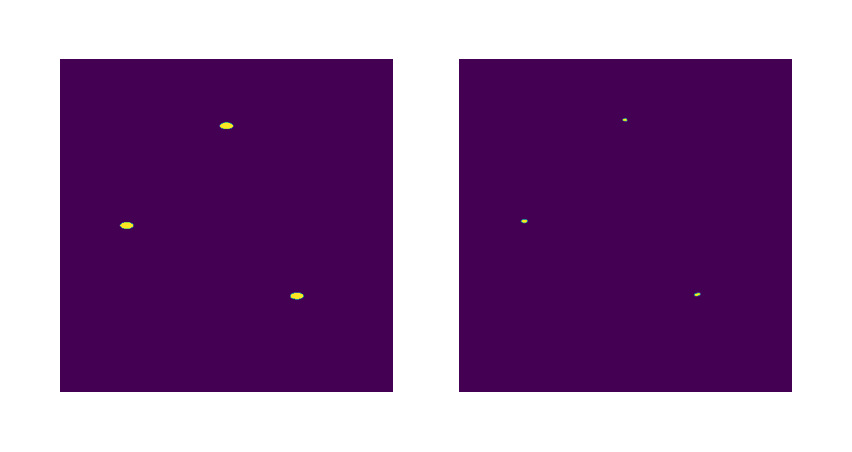

Pred area  97
GT area  471
(GT_area - Pred_area)/GT_area =  79.40552016985139 %


In [23]:
centre_sim = []
os.chdir('/home/aijjeh/Desktop/Phd_Projects/Sequence_prediction/Full_wavefield_frames_time_series_project/AE_exp_results_frames_24_512_512/CFRP_teflon_3o_375_375p_50kHz_5HC_x12_15Vpp/RMS_iou')
data1 = cv2.imread('RMS_L3_S4_B_333x333p_50kHz_5HC_saeed_cmap_viridis_greyscale_THRESHOLDED.png', 0)
pred = cv2.resize(data1, (500,500))
pred = pred/ np.max(pred)
pred = pred * 255
pred = pred.astype(np.uint8)                   

os.chdir('/aijjeh_odroid_sensors/aidd/data/interim/exp/new_exp')
data2 = cv2.imread('label_L3_S4_B_333x333p_100kHz_10HC_14Vpp_x20_pzt.png',0)
gt = cv2.resize(data2, (500,500))
gt = gt / np.max(gt)
gt = gt * 255
gt = gt.astype(np.uint8)

############################################################################################################
plt.figure(figsize=(4 / 2.54, 2 / 2.54), dpi=600)
############################################################################################################
plt.subplot(1,2,1)
plt.imshow(gt)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(pred)
plt.axis('off')
plt.show()

pred_x_y = np.where(pred>(np.max(pred)/2))    
pred_coordinates = np.transpose(np.array(pred_x_y))
x = [p[1] for p in pred_coordinates]
y = [p[0] for p in pred_coordinates]
pred_centroid = (sum(x) / len(pred_coordinates), sum(y) / len(pred_coordinates))

gt_x_y = np.where(gt>(np.max(gt)-55))    
gt_coordinates = np.transpose(np.array(gt_x_y))
x = [p[1] for p in gt_coordinates]
y = [p[0] for p in gt_coordinates]
gt_centroid = (sum(x) / len(gt_coordinates), sum(y) / len(gt_coordinates))

centre_sim.append((pred_centroid[0]*gt_centroid[0] + pred_centroid[1]*gt_centroid[1])/ ((pred_centroid[0]**2+pred_centroid[1]**2)**.5 * (gt_centroid[0]**2+gt_centroid[1]**2)**.5))

pred_area_ones = np.where(pred>=128)
pred_area = len(pred_area_ones[0])

gt_area_ones = np.where(gt>=128)
gt_area = len(gt_area_ones[0])

percent = np.abs(gt_area-pred_area) / (gt_area)
pred_area_.append(pred_area)
gt_area_.append(gt_area)
error.append(percent)
print('Pred area ', pred_area)
print('GT area ', gt_area)
print('(GT_area - Pred_area)/GT_area = ',percent * 100,'%')

In [24]:
mask = np.zeros((500,500), dtype= np.uint8)
retval, thresh_gray = cv2.threshold(pred, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)
contours = cv2.findContours(thresh_gray.copy(),  cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    print(cX, cY)

357 353
97 242
248 90
249 249


In [25]:
mask = np.zeros((500,500), dtype= np.uint8)
retval, thresh_gray = cv2.threshold(gt, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)
contours = cv2.findContours(thresh_gray.copy(),  cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

for c in contours:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    print(cX, cY)

355 355
99 249
249 99
249 249


In [26]:
pred_centre = [357, 353]
gt_center = [355, 355]

centre_sim_1 = (pred_centre[0] * gt_center[0] + pred_centre[1] * gt_center[1]) / ((pred_centre[0]**2 + pred_centre[1]**2)**.5 * (gt_center[0]**2+gt_center[1]**2)**.5)
print("center sim for 1st delamination", centre_sim_1)

center sim for 1st delamination 0.9999841305106791


In [27]:
pred_centre = [97, 242]
gt_center = [99, 249]

centre_sim_2 = (pred_centre[0] * gt_center[0] + pred_centre[1] * gt_center[1]) / ((pred_centre[0]**2 + pred_centre[1]**2)**.5 * (gt_center[0]**2+gt_center[1]**2)**.5)
print("center sim for 2nd delamination", centre_sim_2)

center sim for 2nd delamination 0.9999961044651537


In [28]:
pred_centre = [248, 90]
gt_center = [249, 99]

centre_sim_3 = (pred_centre[0] * gt_center[0] + pred_centre[1] * gt_center[1]) / ((pred_centre[0]**2 + pred_centre[1]**2)**.5 * (gt_center[0]**2+gt_center[1]**2)**.5)
print("center sim for 3rd delamination",centre_sim_3)

center sim for 3rd delamination 0.9995408676346209
